In [202]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [203]:
avocado = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Avocado/avocado.csv")
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [204]:
avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1517.0,2.699539e+01,1.484829e+01,0.00,14.00,29.00,39.00,51.00
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79


Not sure what the column "Unnamed" is for. It's resetting after 51. Dropping it

In [205]:
avocado.drop(["Unnamed: 0"], axis =1, inplace = True)
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [206]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values anywhere

In [207]:
avocado.type.unique()

array(['conventional'], dtype=object)

There only one type in "Type" column. Hence I am dropping it

In [208]:
avocado.drop(["type"], axis =1, inplace = True)
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


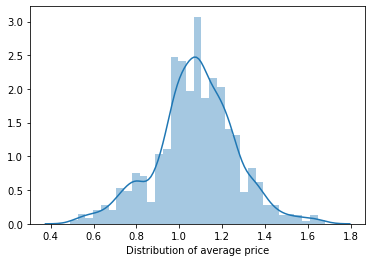

In [209]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

In [210]:
l = LabelEncoder()
avocado['region'] = l.fit_transform(avocado['region'])
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


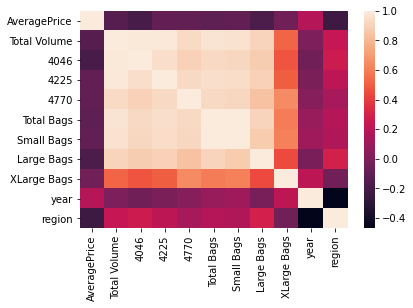

In [211]:
sns.heatmap(avocado.corr())

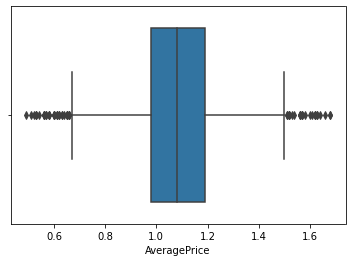

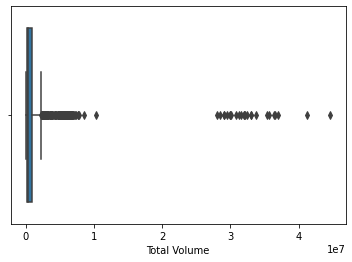

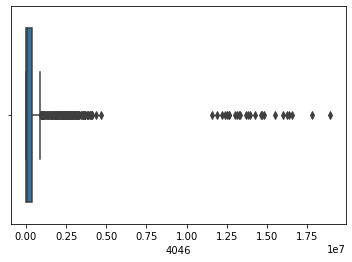

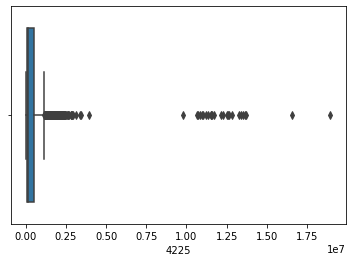

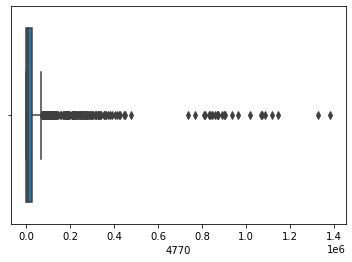

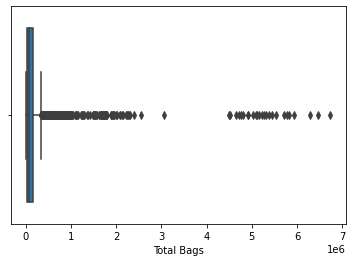

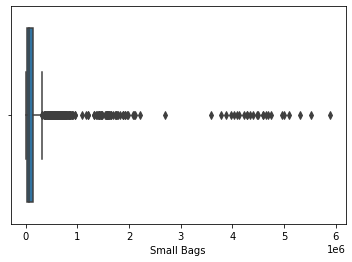

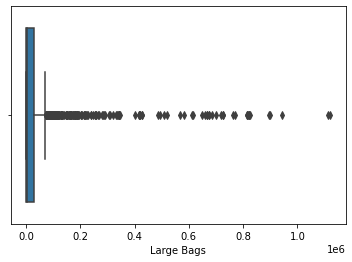

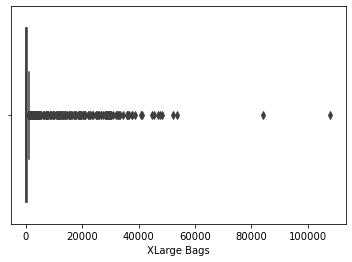

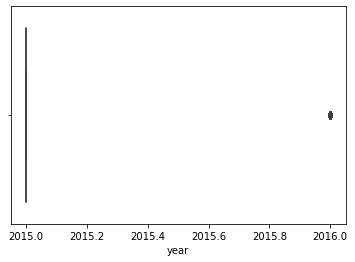

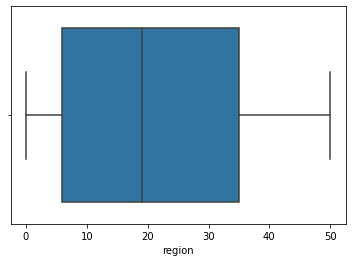

In [212]:
for i in avocado.describe().columns:
    sns.boxplot(avocado[i].dropna())
    plt.show()

There are outliers in many columns. Let's remove them

In [213]:
#encoding dates to numerics
l = LabelEncoder()
avocado['Date'] = l.fit_transform(avocado['Date'])
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [214]:
from scipy import stats
avocado = avocado[(np.abs(stats.zscore(avocado)) < 3).all(axis=1)]
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
Y = avocado["AveragePrice"]
X = avocado.drop('AveragePrice', axis = 1)

In [217]:
Y.shape

(1436,)

In [218]:
Y = Y.values.reshape(-1,1)
Y.shape

(1436, 1)

In [219]:
#Making the columns in similar range
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.376708,-0.563692,-0.476055,-0.537420,-0.486320,-0.538421,-0.523070,-0.481439,-0.299919,-0.413870,-1.322817
1,0.577266,-0.569945,-0.476535,-0.554838,-0.486147,-0.535571,-0.519785,-0.481353,-0.299919,-0.413870,-1.322817
2,-0.222175,-0.527627,-0.476376,-0.440368,-0.484925,-0.540364,-0.525362,-0.481239,-0.299919,-0.413870,-1.322817
3,-1.021617,-0.553834,-0.475929,-0.506329,-0.485906,-0.548589,-0.535018,-0.480620,-0.299919,-0.413870,-1.322817
4,1.576569,-0.572509,-0.476181,-0.556258,-0.485852,-0.547275,-0.533757,-0.479328,-0.299919,-0.413870,-1.322817
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.077615,-0.479107,-0.401216,-0.534028,-0.190287,-0.359700,-0.358845,-0.274115,-0.217396,2.416215,-0.879305
1432,-0.721827,-0.487532,-0.420032,-0.541440,-0.158323,-0.346021,-0.334834,-0.309636,-0.299919,2.416215,-0.879305
1433,-1.521268,-0.487415,-0.416006,-0.540191,-0.203746,-0.349139,-0.340434,-0.316473,-0.016577,2.416215,-0.879305
1434,1.076917,-0.480252,-0.405745,-0.538948,-0.190903,-0.343797,-0.330957,-0.316067,-0.299919,2.416215,-0.879305


# Linear Regression

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 120)
print(Y_train.shape, Y_test.shape)

(1148, 1) (288, 1)


In [222]:
lnr = LinearRegression()
lnr.fit(X_train, Y_train)

LinearRegression()

In [223]:
lnr_pred = lnr.predict(X_test)
lnr_pred

array([[0.99222054],
       [1.09147236],
       [1.19149204],
       [1.18213986],
       [1.03515176],
       [0.85045521],
       [1.02763751],
       [0.91441363],
       [1.17997126],
       [1.06259589],
       [1.18657343],
       [1.08707904],
       [1.11598064],
       [1.0737318 ],
       [1.08621884],
       [0.89088302],
       [1.08481682],
       [1.03643668],
       [1.09631817],
       [1.06467123],
       [1.08063044],
       [0.92822472],
       [1.17838483],
       [1.04432735],
       [1.11521566],
       [1.15125555],
       [1.11461507],
       [1.12372361],
       [0.97680745],
       [1.09912196],
       [1.08974494],
       [1.0501754 ],
       [1.06071618],
       [1.18491164],
       [1.07822698],
       [1.05133962],
       [0.98515576],
       [1.00865529],
       [1.11406956],
       [1.11189127],
       [1.18966231],
       [0.99742614],
       [1.01231777],
       [1.21125587],
       [1.07826194],
       [0.9458224 ],
       [1.02738497],
       [1.187

In [224]:
lnr_accuracy = round(lnr.score(X_train, Y_train)*100)
lnr_accuracy

23.0

In [225]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [226]:
print('Mean absolute error:', mean_absolute_error(Y_test, lnr_pred))
print('Mean squared error:', mean_squared_error(Y_test, lnr_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, lnr_pred)))
print('R2 score is:', r2_score(Y_test, lnr_pred))

Mean absolute error: 0.13076557453741178
Mean squared error: 0.028606080603278308
Root Mean squared error: 0.16913332197789502
R2 score is: 0.19005099987696805


# DecisionTree

In [227]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_pred

array([1.03015707, 1.03015707, 1.15947368, 1.27686275, 0.74645455,
       0.98      , 0.74645455, 0.98      , 1.03015707, 1.03015707,
       1.15947368, 1.05594059, 1.14440217, 1.14440217, 1.14440217,
       0.98      , 1.14440217, 0.74645455, 1.27686275, 1.12814516,
       1.05594059, 0.74645455, 1.27686275, 1.05594059, 1.27686275,
       1.21431193, 1.03015707, 1.21431193, 0.74645455, 1.15947368,
       1.15947368, 1.03015707, 1.05594059, 1.15947368, 1.14440217,
       0.74645455, 0.74645455, 1.05594059, 1.03015707, 1.12814516,
       1.27686275, 0.98      , 1.03015707, 1.21431193, 1.03015707,
       0.74645455, 0.98      , 1.03015707, 1.12814516, 1.05594059,
       0.98      , 1.03015707, 1.14440217, 1.15947368, 0.98      ,
       0.74645455, 1.05594059, 0.98      , 0.98      , 1.21431193,
       1.12814516, 1.03015707, 1.03015707, 1.05594059, 1.21431193,
       0.98      , 1.12814516, 0.74645455, 0.98      , 1.15947368,
       0.98      , 1.14440217, 1.05594059, 1.12814516, 1.15947

In [228]:
tree_accuracy = round(tree.score(X_train, Y_train)*100)
tree_accuracy

53.0

In [229]:
print('Mean absolute error:', mean_absolute_error(Y_test, tree_pred))
print('Mean squared error:', mean_squared_error(Y_test, tree_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, tree_pred)))
print('R2 score is:', r2_score(Y_test, tree_pred))

Mean absolute error: 0.10053641050237319
Mean squared error: 0.016483815293948656
Root Mean squared error: 0.12838931144744353
R2 score is: 0.5332793086650115


# RandomForestRegressor

In [230]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([1.05980316, 1.06318184, 1.09214642, 1.23148964, 0.86807897,
       0.86777774, 0.86807897, 0.86807897, 1.14487632, 1.06767728,
       1.1565007 , 1.08205365, 1.15080356, 1.12826477, 1.10679327,
       0.86777774, 1.09996889, 0.88074988, 1.23065204, 1.15725182,
       1.07711861, 0.86777774, 1.23468775, 1.09477514, 1.23382651,
       1.1742767 , 1.08599251, 1.19705374, 0.86777774, 1.08968234,
       1.09233773, 1.07897201, 0.98924625, 1.11322107, 1.1011394 ,
       0.87328208, 0.86777774, 1.08613033, 1.06306495, 1.20556599,
       1.23148964, 0.86777774, 1.0619322 , 1.18874729, 1.07725606,
       0.86777774, 0.86777774, 1.13064508, 1.16786362, 1.09037275,
       0.86777774, 1.06225666, 1.15165667, 1.0954641 , 0.86777774,
       0.86777774, 1.08958402, 0.86777774, 0.86807897, 1.18996396,
       1.16774546, 1.06382492, 1.10701883, 1.09468739, 1.16857069,
       0.86777774, 1.15892134, 0.86777774, 0.86777774, 1.09051414,
       0.86777774, 1.18341413, 1.0926983 , 1.20502112, 1.13151

In [231]:
rf_accuracy = round(rf.score(X_train, Y_train)*100)
rf_accuracy

44.0

In [232]:
print('Mean absolute error:', mean_absolute_error(Y_test, rf_pred))
print('Mean squared error:', mean_squared_error(Y_test, rf_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, rf_pred)))
print('R2 score is:', r2_score(Y_test, rf_pred))

Mean absolute error: 0.11673292742649077
Mean squared error: 0.02171535005293733
Root Mean squared error: 0.14736129089057726
R2 score is: 0.38515428567020926


# XGBoost Regressor

In [233]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xg.fit(X_train, Y_train)
xg_pred = xg.predict(X_test)
xg_pred

array([0.9716409 , 1.0406535 , 1.1453123 , 1.5251458 , 0.78878284,
       0.8714855 , 0.72171324, 1.0440583 , 1.1325859 , 1.0060153 ,
       1.200129  , 1.0630314 , 1.1869177 , 1.2187204 , 1.1809756 ,
       0.97983545, 1.2146933 , 1.0637726 , 1.1537619 , 1.0697564 ,
       1.0287454 , 0.5792078 , 1.4060762 , 1.1745014 , 1.3204304 ,
       1.2234505 , 1.013231  , 1.3642079 , 0.6833362 , 1.1621845 ,
       1.0513664 , 1.1802595 , 0.8986348 , 1.1860303 , 1.12716   ,
       0.95207155, 0.5734095 , 0.99196386, 1.0510815 , 1.1240444 ,
       1.5884312 , 1.0746598 , 1.0445678 , 1.0784432 , 1.0673113 ,
       0.58389515, 0.840385  , 0.8650448 , 1.0434341 , 1.1044763 ,
       0.94051754, 1.0162401 , 1.3603083 , 1.0752966 , 0.8214364 ,
       0.65507114, 1.0422233 , 0.82056487, 1.0590589 , 1.0707363 ,
       1.1697222 , 1.0396941 , 0.98596925, 1.2344497 , 1.1389403 ,
       0.8497842 , 1.1042325 , 0.7609552 , 0.8449702 , 1.0563031 ,
       0.9427109 , 1.229079  , 1.1291916 , 1.1961021 , 1.24121

In [234]:
xg_accuracy = round(xg.score(X_train, Y_train)*100)
xg_accuracy

100.0

In [235]:
print('Mean absolute error:', mean_absolute_error(Y_test, xg_pred))
print('Mean squared error:', mean_squared_error(Y_test, xg_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, xg_pred)))
print('R2 score is:', r2_score(Y_test, xg_pred))

Mean absolute error: 0.05381481005913681
Mean squared error: 0.0053805661069129315
Root Mean squared error: 0.07335234220468309
R2 score is: 0.8476553219985484


XGBoost Regressor performs better than others

In [236]:
import pickle

In [237]:
filename = 'avocado_Price.pkl'
pickle.dump(xg, open(filename, 'wb'))

# Region/City prediction

In [260]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [240]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [241]:
Y = avocado["region"]
X = avocado.drop('region', axis = 1)

In [242]:
Y.shape

(1436,)

In [243]:
Y = Y.values.reshape(-1,1)
Y.shape

(1436, 1)

In [244]:
X

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [245]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.376708,1.344989,-0.563692,-0.476055,-0.537420,-0.486320,-0.538421,-0.523070,-0.481439,-0.299919,-0.413870
1,0.577266,1.451388,-0.569945,-0.476535,-0.554838,-0.486147,-0.535571,-0.519785,-0.481353,-0.299919,-0.413870
2,-0.222175,-0.782987,-0.527627,-0.476376,-0.440368,-0.484925,-0.540364,-0.525362,-0.481239,-0.299919,-0.413870
3,-1.021617,0.015004,-0.553834,-0.475929,-0.506329,-0.485906,-0.548589,-0.535018,-0.480620,-0.299919,-0.413870
4,1.576569,1.078992,-0.572509,-0.476181,-0.556258,-0.485852,-0.547275,-0.533757,-0.479328,-0.299919,-0.413870
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.077615,1.664186,-0.479107,-0.401216,-0.534028,-0.190287,-0.359700,-0.358845,-0.274115,-0.217396,2.416215
1432,-0.721827,2.302579,-0.487532,-0.420032,-0.541440,-0.158323,-0.346021,-0.334834,-0.309636,-0.299919,2.416215
1433,-1.521268,2.142980,-0.487415,-0.416006,-0.540191,-0.203746,-0.349139,-0.340434,-0.316473,-0.016577,2.416215
1434,1.076917,2.089781,-0.480252,-0.405745,-0.538948,-0.190903,-0.343797,-0.330957,-0.316067,-0.299919,2.416215


In [247]:
X_train, X_test, Y_train, Y_test = train_test_split(avocado.drop("region", axis = 1), avocado["region"], test_size = 0.2, random_state = 42)

In [248]:
Y_train.shape

(1148,)

In [249]:
Y_train = Y_train.values.reshape(-1,1)
Y_train.shape

(1148, 1)

In [250]:
Y_test.shape

(288,)

In [251]:
Y_test = Y_test.values.reshape(-1,1)
Y_test.shape

(288, 1)

# MultinomialNB

In [252]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
predmnb = mnb.predict(X_test)
print(accuracy_score(Y_test, predmnb))
print(confusion_matrix(Y_test, predmnb))
print(classification_report(Y_test, predmnb))

0.6909722222222222
[[ 8  0  0 ...  0  0  0]
 [ 0  4  0 ...  2  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       1.00      0.31      0.47        13
           2       1.00      1.00      1.00        12
           3       0.62      0.83      0.71         6
           4       0.67      0.44      0.53         9
           5       1.00      0.91      0.95        11
           6       1.00      0.10      0.18        10
           7       0.60      0.75      0.67         8
           8       1.00      1.00      1.00         6
           9       0.92      1.00      0.96        11
          10       0.33      1.00      0.50         3
          11       0.80      1.00      0.89         4
          12       1.00      0.83      0.91        12
          13       0.60      0.75      0.67         4
          14  

In [261]:
print('Mean absolute error:', mean_absolute_error(Y_test, predmnb))
print('Mean squared error:', mean_squared_error(Y_test, predmnb))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predmnb)))
print('R2 score is:', r2_score(Y_test, predmnb))

Mean absolute error: 5.190972222222222
Mean squared error: 118.55208333333333
Root Mean squared error: 10.888162532463102
R2 score is: 0.5340097781713848


# DecisionTree

In [253]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(Y_test, preddtc))
print(confusion_matrix(Y_test, preddtc))
print(classification_report(Y_test, preddtc))

0.8819444444444444
[[10  0  0 ...  0  0  0]
 [ 0 12  0 ...  1  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  1  0 ...  5  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.92      0.92      0.92        13
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00         6
           4       0.90      1.00      0.95         9
           5       0.92      1.00      0.96        11
           6       0.83      1.00      0.91        10
           7       0.89      1.00      0.94         8
           8       1.00      0.83      0.91         6
           9       0.90      0.82      0.86        11
          10       0.60      1.00      0.75         3
          11       0.33      0.25      0.29         4
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14  

In [262]:
print('Mean absolute error:', mean_absolute_error(Y_test, preddtc))
print('Mean squared error:', mean_squared_error(Y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, preddtc)))
print('R2 score is:', r2_score(Y_test, preddtc))

Mean absolute error: 2.7916666666666665
Mean squared error: 85.11805555555556
Root Mean squared error: 9.225944697187142
R2 score is: 0.6654282196085093


# KNeighbors

In [254]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
print(accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))

0.8298611111111112
[[12  0  0 ...  0  0  0]
 [ 0 12  0 ...  1  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.86      0.92      0.89        13
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00         6
           4       0.80      0.89      0.84         9
           5       0.92      1.00      0.96        11
           6       0.67      0.80      0.73        10
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         6
           9       0.91      0.91      0.91        11
          10       0.40      0.67      0.50         3
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00        12
          13       1.00      0.50      0.67         4
          14  

In [265]:
print('Mean absolute error:', mean_absolute_error(Y_test, predknn))
print('Mean squared error:', mean_squared_error(Y_test, predknn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predknn)))
print('R2 score is:', r2_score(Y_test, predknn))

Mean absolute error: 3.2569444444444446
Mean squared error: 90.26388888888889
Root Mean squared error: 9.500730966030398
R2 score is: 0.6452015989615243


# SVC

In [258]:
svck = SVC(kernel = 'poly')
svck.fit(X_train, Y_train)
svck.score(X_train, Y_train)
predsvck = svck.predict(X_test)
print(accuracy_score(Y_test, predsvck))
print(confusion_matrix(Y_test, predsvck))
print(classification_report(Y_test, predsvck)) 

0.2013888888888889
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        13
           2       0.43      0.25      0.32        12
           3       0.03      1.00      0.05         6
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       1.00      1.00      1.00        10
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         4
          14       1.00      1.00      1.00       

In [263]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvck))
print('Mean squared error:', mean_squared_error(Y_test, predsvck))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvck)))
print('R2 score is:', r2_score(Y_test, predsvck))

Mean absolute error: 14.756944444444445
Mean squared error: 449.3888888888889
Root Mean squared error: 21.1987945149928
R2 score is: -0.766403610401742


In [259]:
svcr = SVC(kernel = 'rbf')
svcr.fit(X_train, Y_train)
svcr.score(X_train, Y_train)
predsvcr = svcr.predict(X_test)
print(accuracy_score(Y_test, predsvcr))
print(confusion_matrix(Y_test, predsvcr))
print(classification_report(Y_test, predsvcr)) 

0.2951388888888889
[[ 0  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  4  0 ...  0  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  2  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.30      1.00      0.46        13
           2       0.50      1.00      0.67        12
           3       0.04      1.00      0.09         6
           4       0.40      0.89      0.55         9
           5       0.00      0.00      0.00        11
           6       0.86      0.60      0.71        10
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         4
          14  

In [264]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvcr))
print('Mean squared error:', mean_squared_error(Y_test, predsvcr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvcr)))
print('R2 score is:', r2_score(Y_test, predsvcr))

Mean absolute error: 15.125
Mean squared error: 470.0763888888889
Root Mean squared error: 21.681245095448023
R2 score is: -0.8477195387517666


DecisionTree gives better accuracy

In [266]:
import pickle
filename = 'avocado_region.pkl'
pickle.dump(dtc, open(filename, 'wb'))